# Assignment 3: Exercises 6.1, 7.1, 8.1
Aaron Ou | 2018-03-08

In [1]:
rm(list = ls())
cat('\014') # clear console = Ctrl + L

### 6.1 a:

<!--(a) Estimate the minimum detectable effect for a two sided comparison of means with sample size of 440,
standard deviation of 10.2, significance level of 0.05, and power of 80%. What happens to the MDE if you increase
the sample size?
-->

In [2]:
# n = 440, sd = 10.2, sig.level = 0.05, power = 80%
power.t.test(n = 440, delta = NULL, sd = 10.2, sig.level = 0.05, power = 0.8,
             type = "two.sample",
             alternative = "two.sided",
             strict = FALSE)


     Two-sample t test power calculation 

              n = 440
          delta = 1.92873
             sd = 10.2
      sig.level = 0.05
          power = 0.8
    alternative = two.sided

NOTE: n is number in *each* group


If the sample size increases, the MDE will decrease.

### 6.1 b:

<!--
(b) Estimate the statistical power for a two sided comparison of means test with significance level of 0.10, sample
size of 20500, and standard deviation of 1010, and MDE of 250. What happens to the statistical power if you
increase the standard deviation?
-->

In [3]:
# n = 20500, sig.level  = 0.1, sd = 1010, MDE = 250
power.t.test(n = 20500, delta = 250, sd = 1010, sig.level = 0.1, power = NULL,
             type = "two.sample",
             alternative = "two.sided",
             strict = FALSE)


     Two-sample t test power calculation 

              n = 20500
          delta = 250
             sd = 1010
      sig.level = 0.1
          power = 1
    alternative = two.sided

NOTE: n is number in *each* group


If the standard deviation increases, statistical power will decrease.

### 6.1 c:

<!--
(c) Estimate the required sample size for significance level of 0.05, power of 80% standard deviation of 0.65 and MDE of .03. What happens to the required sample size when you increase the power?
-->

In [4]:
# n = NULL, sig.level = 0.05, power = 0.8, sd = 0.65, MDE = .03
power.t.test(n = NULL, sig.level = 0.05, power = 0.8, sd = 0.65, delta = 0.03,
             type = "two.sample",
             alternative = "two.sided",
             strict = FALSE)


     Two-sample t test power calculation 

              n = 7370.186
          delta = 0.03
             sd = 0.65
      sig.level = 0.05
          power = 0.8
    alternative = two.sided

NOTE: n is number in *each* group


A required sample size of 7370.
If the power increases, the required sample size will have to increase too to maintain the same MDE.

### 7.1 a:

<!--
(a) Repeat what we've done above (Graph and Sharp RD regressions) for at least two separate versions, varying the choice for the values of Z we include in the sample (band size-- something other than +-200) in one version, and the bin size in another (something other than 10). Interpret the results of the graphs and regression. What effect do the selected bin and band size have on the results?
-->

In [5]:
# Load packages needed
library(ggplot2, verbose=FALSE, warn.conflicts = FALSE, quietly = TRUE)
library(dplyr, verbose=FALSE, warn.conflicts = FALSE, quietly = TRUE)
library(miceadds, verbose=FALSE, warn.conflicts = FALSE, quietly = TRUE)
library(multiwayvcov, verbose=FALSE, warn.conflicts = FALSE, quietly = TRUE)
library(repr)
library(grid)　# used to define multiplot()

# Define a function to arrange plot for comparison
multiplot <- function(..., plotlist=NULL, file, cols=1, layout=NULL) {

  # Make a list from the ... arguments and plotlist
  plots <- c(list(...), plotlist)

  numPlots = length(plots)

  # If layout is NULL, then use 'cols' to determine layout
  if (is.null(layout)) {
    # Make the panel
    # ncol: Number of columns of plots
    # nrow: Number of rows needed, calculated from # of cols
    layout <- matrix(seq(1, cols * ceiling(numPlots/cols)),
                    ncol = cols, nrow = ceiling(numPlots/cols), byrow = TRUE)
  }

 if (numPlots==1) {
    print(plots[[1]])

  } else {
    # Set up the page
    grid.newpage()
    pushViewport(viewport(layout = grid.layout(nrow(layout), ncol(layout))))

    # Make each plot, in the correct location
    for (i in 1:numPlots) {
      # Get the i,j matrix positions of the regions that contain this subplot
      matchidx <- as.data.frame(which(layout == i, arr.ind = TRUE))

      print(plots[[i]], vp = viewport(layout.pos.row = matchidx$row,
                                      layout.pos.col = matchidx$col))
    }
  }
}

* miceadds 2.9-15 (2017-12-18 11:50:04)


In [6]:
# Read raw data
d0 <- read.csv('../Data/PROGRESA_RD.csv')

In [7]:
# Define function for exercise 7.1
A71Clean <- function(band_size, bin_size) { # band_bin is a vector, e.g. c(200, 10)
  #cat("---- Step 1: Clean data to get data frame d1 ----\n")
  d1 <<- d0 %>% filter(z >= -band_size, z <= band_size) %>% arrange(z) %>%
          mutate(bin0 = cut_interval(z, length = bin_size, labels = FALSE),
            bin = -(band_size + bin_size) + bin0 * bin_size,
            enroll_child = sapply(enroll_child, function(x) ifelse(x == "si", 1, 0))
            ) %>%
          select("bin", "z", "enroll_child", "pov_HH", "villid") %>% ungroup
  # print(tail(d1, 2))
  # cat("\n---- Step 2: Aggregate d1 in bin for means to get data frame r1 ----\n")
  # Aggregate data by bin. "r" means ready for plot
  r1 <<- group_by(d1, bin) %>%
          summarise(z = round(mean(z, na.rm = T), 0),
                    enroll_child = round(mean(enroll_child, na.rm = T), 2)
            ) %>% ungroup
  # print(tail(r1, 2))
}

# Cutoff (Treatment: z < 0)
A71Plot <- function(band_size, bin_size) {
  A71Clean(band_size, bin_size)
  p1 <- ggplot(r1, aes(x = bin, y = enroll_child)) +
    geom_point(color = 'blue') +
    geom_smooth(color = 'red', method = 'lm', formula = y ~ x, data = filter(r1, bin > 0)) +
    geom_smooth(color = 'green', method = 'lm', formula = y ~ x, data = filter(r1, bin < 0)) +
    xlab("z") + ylab("Child Enrollment") + 
    ggtitle(paste0("band size=", band_size, "   bin size=", bin_size)) +
    theme_linedraw()
  p1
}

A71Regression <- function(band_size, bin_size) {
  A71Clean(band_size, bin_size)
  cat(paste0("\n---- Regression model: band size=", band_size, "  bin=", bin_size, " ----\n"))
  # pov_HH = 1: below the cutoff
  model <- lm.cluster(data = d1, formula = enroll_child ~ pov_HH + z, cluster = d1$villid)
  summary(model)
  cat("\n---- Quadratic control for z, regression model ----")
  d1$z2 <- d1$z^2
  model2 <- lm.cluster(data = d1, formula = enroll_child ~ pov_HH + z + z2, cluster = d1$villid)
  summary(model2)
  cat("----------------------------------------------------------------\n")
}

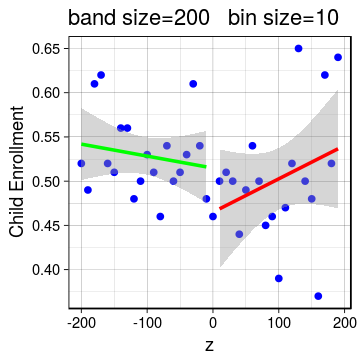

In [8]:
# Version 0 in Lab 7: band_size = 200, bin_size = 10
# Set plot size to 3 x 3
options(repr.plot.width = 3, repr.plot.height = 3)
A71Plot(200, 10)

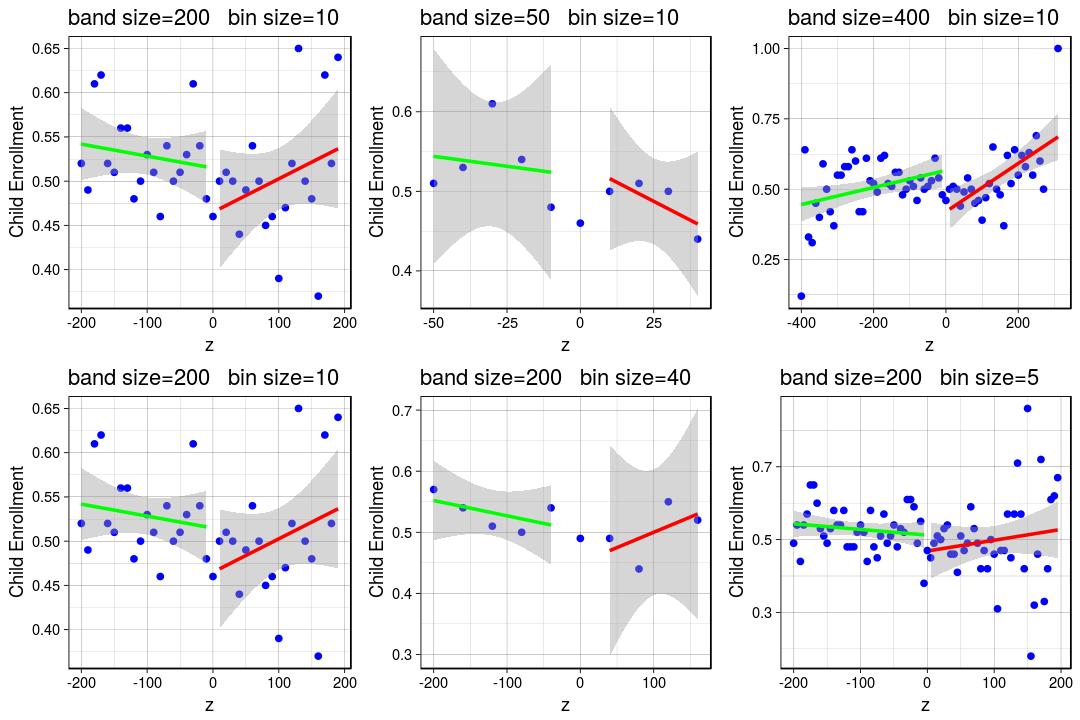

In [9]:
# Compare the plots of three versions by adjusting ban size or bin size
# Set plot size
options(repr.plot.width = 9, repr.plot.height = 6)
multiplot(
  A71Plot(200, 10), # band_size = 200, bin_size remains 10
  A71Plot(50, 10),
  A71Plot(400, 10),
    
  A71Plot(200, 10), # band_size remains 200, bin_size = 10 
  A71Plot(200, 40),
  A71Plot(200, 5),
  cols = 3)

**Interpreting the graphs**
- As bin size decreases, while the granularity in association between z and enrollment increases, it adds additional noice around the cut-off because some bins have very few observations, making it difficult to see.
- As band size increases, while it leads to more data on the tails, the new points certainly affect the trend, thus introduce bias. However, more observations gives us a larger sample size/more statistical power. 

In [10]:
# Compare the regressions of three versions by adjusting ban size or bin size
cat("============= Adjust band size at the same bin size =============")
A71Regression(200, 10)
A71Regression(50, 10)
A71Regression(400, 10)

cat("==================================================================")
cat("\n============= Adjust bin size  at the same band size =============")
A71Regression(200, 10)
A71Regression(200, 40)
A71Regression(200, 5)

============= Adjust band size at the same bin size =============
---- Regression model: band size=200  bin=10 ----
R^2 = 0.00119 

                 Estimate   Std. Error    t value      Pr(>|t|)
(Intercept)  4.943732e-01 0.0195547719 25.2814633 5.108385e-141
pov_HH       2.953866e-02 0.0281280015  1.0501512  2.936486e-01
z           -3.816885e-05 0.0001534685 -0.2487079  8.035867e-01

---- Quadratic control for z, regression model ----R^2 = 0.00178 

                Estimate   Std. Error    t value      Pr(>|t|)
(Intercept) 4.789523e-01 2.252099e-02 21.2669323 2.298280e-100
pov_HH      3.885764e-02 2.869374e-02  1.3542201  1.756662e-01
z           5.639947e-05 1.648254e-04  0.3421771  7.322176e-01
z2          1.285038e-06 8.800953e-07  1.4601123  1.442592e-01
----------------------------------------------------------------

---- Regression model: band size=50  bin=10 ----
R^2 = 0.00286 

                 Estimate   Std. Error    t value     Pr(>|t|)
(Intercept)  0.4959626627 0.0326682

#### Interpretation

In general, the pattern of graph and the p-value (Confidence level) of `pov_HH` under the two models are more sensitive to the change of **band size** than to the change of **bin size**.

- As **band size** increases, the p-value of `pov_HH` decreases, resulting in higher confidence level.

band_size | p-value of `pov_HH` | p-value of `pov_HH`　Quadratic control
--- | --- | ---
50 | 6.425800e-01 | 6.479663e-01
200 | 2.936486e-01 | 1.756662e-01
400 | 4.478301e-02 | 2.252483e-02

- No matter **bin size** increases or decreases, the graph and the regression models do not see significant change.

bin_size | p-value of `pov_HH` | p-value of `pov_HH` Quadratic control
--- | --- | ---
5 | 2.936486e-01 | 1.756662e-01
10 | 2.936486e-01 | 1.756662e-01
40 | 2.936486e-01 | 1.756662e-01

### 7.1 b:
<!--
(b) In the above analysis, we compare household within treatment villages. Describe at least one reason we might be concerned that a comparison of households below and above the cutoff to identify the treatment effect of PROGRESA might lead to a biased result.
-->

Reasons that might lead to a biased result:
- Household below the cutoff may live in poorer area, have less access to schools. Even when they want to enroll kids in school, they find it difficult to do so. Thus, the effect of PROGRESA may be underestimated.
- Spillover. Control that are Treated's relatives may end up participating.

### 8.1 a:
<!--
(a) Create histograms to see the distribution of income per household member by treatment and
control in 2000 and then in 2003. You will need to add
+ scale_x_continuous(limits = c(0, 5000))
-->

In [11]:
# Read raw data and clean for difference in difference exercise
did <- read.csv("../Data/DID_OPORTUNIDADES.csv", header = TRUE) %>%
  filter(year %in% c(2000, 2003), !is.na(Income_HH_per)) 
head(did, 1)
summary(did$Income_HH_per)

X,year,villid,geopolid,hogid2,indexpov_HH,pov_HH,D_HH,D,iid2,⋯,Measure,famsize,HH,agehead,sexhead,uniqvill,uniqhh,period,aux,aux2
29032,2003,12001177,12,120011772003000460,1.2931,1,Control,Control,1200117720030004604,⋯,NA,4,0,57,0,0,1,1,NA,-Inf


     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
      0.1     200.0     333.3     663.6     573.8 2060185.1 

Warning message:
“Removed 453 rows containing non-finite values (stat_bin).”Warning message:
“Removed 5 rows containing missing values (geom_bar).”Warning message:
“Removed 404 rows containing non-finite values (stat_bin).”Warning message:
“Removed 6 rows containing missing values (geom_bar).”Warning message:
“Removed 338 rows containing non-finite values (stat_bin).”Warning message:
“Removed 5 rows containing missing values (geom_bar).”Warning message:
“Removed 167 rows containing non-finite values (stat_bin).”Warning message:
“Removed 7 rows containing missing values (geom_bar).”

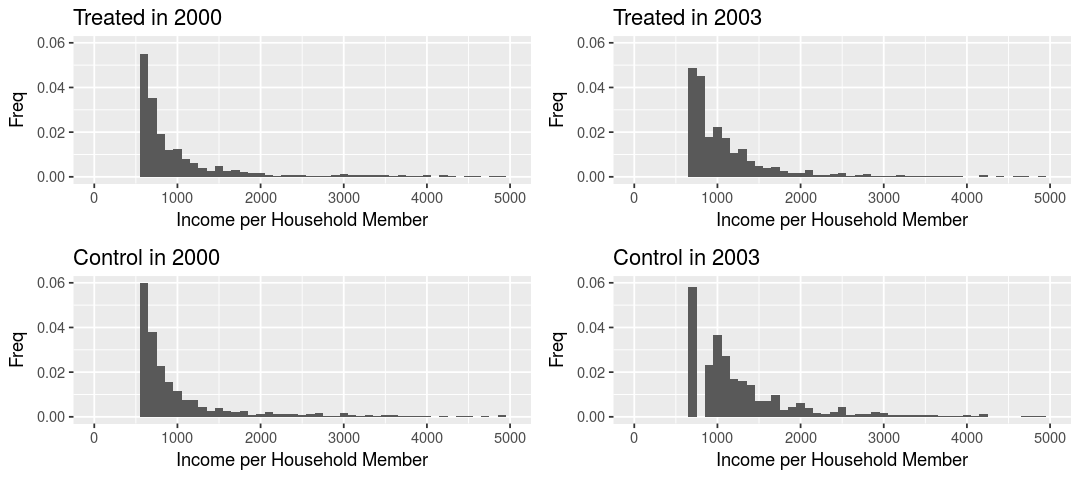

In [12]:
# Method 1: Plot one by one
options(repr.plot.width = 9, repr.plot.height = 4)
PlotHist <- function(year_value, d_value) {
  did %>% filter(year == year_value, D == d_value) %>%
    ggplot() +
    aes(x = Income_HH_per, y = ..count../sum(..count..)) +
    geom_histogram(binwidth = 100) +
    scale_x_continuous(limits = c(0, 5000)) +
    scale_y_continuous(limits = c(0, 0.06)) +
    ggtitle(paste0(d_value, " in ", year_value)) +
    xlab("Income per Household Member") +
    ylab("Freq")
}
multiplot(
  PlotHist(2000, "Treated"),
  PlotHist(2003, "Treated"),
  PlotHist(2000, "Control"),
  PlotHist(2003, "Control"),
  cols = 2)

As seen above, it is difficult to compare between year or treated/control from the graph in Method 1.

Warning message:
“Removed 6102 rows containing non-finite values (stat_bin).”

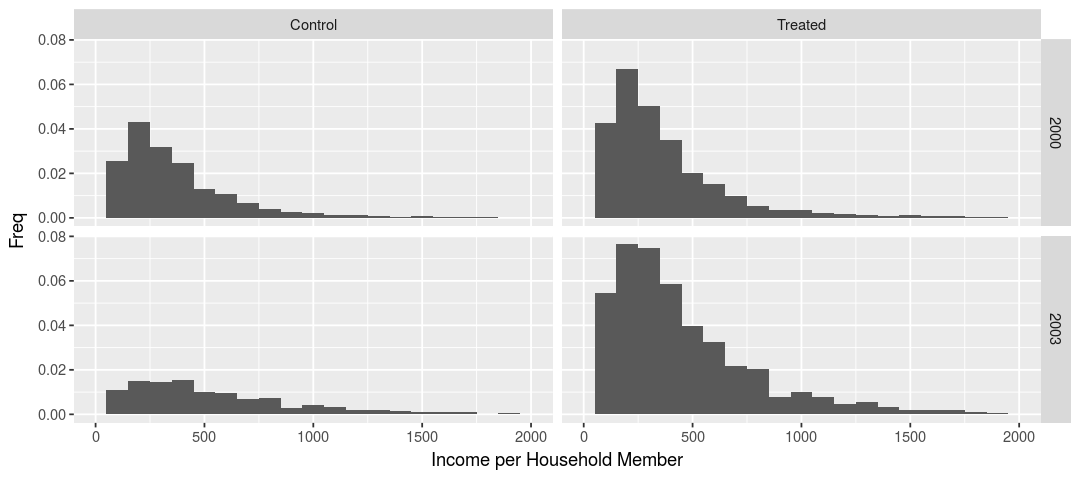

In [13]:
# Method 2: using facet_grid to generate Method 1 at once; but shorten the x range to 0-2000
did %>%
  ggplot() +
  aes(x = Income_HH_per, y = ..count../sum(..count..)) +
  geom_histogram(binwidth = 100) +
  scale_x_continuous(limits = c(0, 2000)) +
  xlab("Income per Household Member") +
  ylab("Freq") +
  facet_grid(year ~ D)

Warning message:
“Removed 6102 rows containing non-finite values (stat_count).”Warning message:
“position_dodge requires non-overlapping x intervals”Warning message:
“position_dodge requires non-overlapping x intervals”Warning message:
“Removed 81 rows containing missing values (geom_bar).”

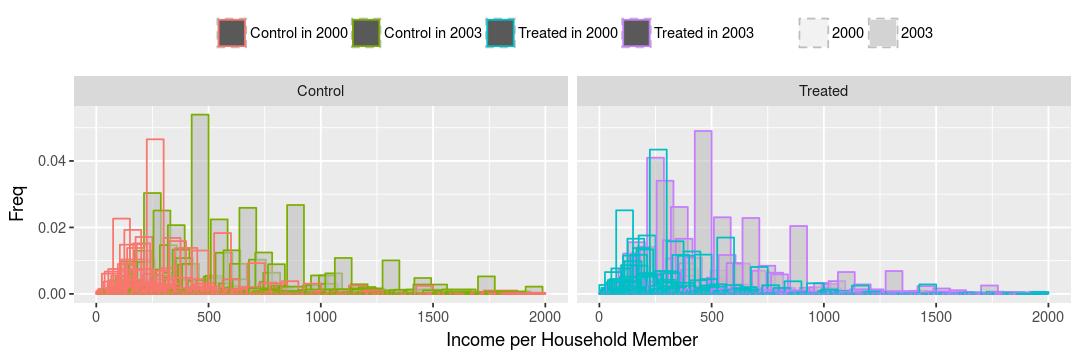

In [14]:
# Method 3: Plot before (2000) and after (2003) side by side
options(repr.plot.width = 9, repr.plot.height = 3)
did %>%
  ggplot() + 
  geom_bar(mapping = aes(x = Income_HH_per, y = ..prop.., fill = factor(year),
                         color = paste0(D, " in ", year)),
           width = 150, position = "dodge") +
  xlab("Income per Household Member") +
  ylab("Freq") +
  scale_x_continuous(limits = c(0, 2000)) +
  scale_fill_manual(values = c(alpha("white", 0), alpha("gray", .6))) +
  theme(legend.position = "top", legend.title = element_blank(),
        legend.key = element_rect(colour = 'gray', size = 0.5, linetype = 'dashed')) +
  facet_wrap(~ D, ncol = 2)

In the graph (Method 3) above, it is easy to see the increase of Income per Household Member in 2003 compared to 2000.

### 8.1 b:
<!--
(b) Use a difference in differences regression model to estimate the average treatment effect on
income per household member (use controls as above). Interpret the results of the regression.
-->

In [15]:
d4model <- did %>%
 mutate(D = sapply(D, function(x) ifelse(x == "Treated", 1, 0)),
        D_period = D * period)

# Adding Controls 
did_model <- lm(Income_HH_per ~ D_period + D + period + age + sex + agehead + sexhead, data = d4model)
summary(did_model)


Call:
lm(formula = Income_HH_per ~ D_period + D + period + age + sex + 
    agehead + sexhead, data = d4model)

Residuals:
    Min      1Q  Median      3Q     Max 
  -1614    -467    -269     -24 2058993 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  713.815    116.006   6.153 7.60e-10 ***
D_period     314.897    121.437   2.593 0.009512 ** 
D           -460.915     85.295  -5.404 6.53e-08 ***
period      -390.843    101.437  -3.853 0.000117 ***
age            3.657      1.456   2.511 0.012026 *  
sex          -10.180     53.860  -0.189 0.850087    
agehead        6.136      2.130   2.881 0.003970 ** 
sexhead      -74.493     95.660  -0.779 0.436137    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12850 on 228813 degrees of freedom
  (16400 observations deleted due to missingness)
Multiple R-squared:  0.0003363,	Adjusted R-squared:  0.0003057 
F-statistic:    11 on 7 and 228813 DF,  p-value: 5.741e-14


**Interpretation**

 | coefficient | p-value
--- | --- | ---
D_period | 314.9 |  0.009512**

The p-value is small enough to suggest statistical significance. While controlling for other factors including age, sex of child, household head age and sex, the treatment brings 315 pesos increase in the income of per household member.